In [65]:
import pandas as pd

In [66]:
votes = pd.read_csv("/home/niraj/Downloads/114_congress.csv")

In [67]:
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [68]:
votes.describe()

,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
count,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.325000,0.575000,0.535000,0.94500,0.54500,0.415000,0.54500,0.985000,0.525000,0.545000,0.410000,0.480000,0.510000,0.460000,0.370000
std,0.462618,0.494286,0.498761,0.22355,0.49795,0.492648,0.49795,0.111351,0.494286,0.487702,0.489176,0.497062,0.497367,0.495841,0.480004
min,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.00000,0.00000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.00000,1.00000,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
print(votes.shape)

(100, 18)


In [70]:
pd.value_counts(votes.iloc[:,3:].values.ravel())

1.0    803
0.0    669
0.5     28
dtype: int64

In [71]:
from sklearn.cluster import KMeans

In [72]:
kmeans_model = KMeans(n_clusters=2,random_state=1).fit(votes.iloc[:,3:])

In [73]:
labels = kmeans_model.labels_

In [74]:
pd.crosstab(labels,votes["party"])

party,D,I,R
row_0,,,
0,41,2,0
1,3,0,54


In [75]:
democratic_oddballs=votes[(labels==1) & (votes["party"]=="D")]

In [76]:
democratic_oddballs

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
42,Heitkamp,D,ND,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
74,Reid,D,NV,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [77]:
democratic_oddballs["name"]

42    Heitkamp
56     Manchin
74        Reid
Name: name, dtype: object

In [78]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [80]:
pca_2 = PCA(2)

In [81]:
pca_2

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [82]:
plot_columns = pca_2.fit_transform(votes.iloc[:,3:18])
plot_columns

array([[-1.01404771,  0.34503681],
       [-0.16486993,  0.88502064],
       [ 2.01879354, -0.25098295],
       [-1.57876445, -0.07429597],
       [ 1.26163015,  1.07112203],
       [ 2.01879354, -0.25098295],
       [-1.57876445, -0.07429597],
       [ 2.01879354, -0.25098295],
       [-1.57876445, -0.07429597],
       [ 1.90485799,  0.01786626],
       [ 2.01879354, -0.25098295],
       [-1.29152845,  0.082353  ],
       [ 2.01879354, -0.25098295],
       [-1.4648289 , -0.34314518],
       [ 2.01879354, -0.25098295],
       [ 1.51985015,  0.65615414],
       [ 1.50838873,  0.12813341],
       [-1.57876445, -0.07429597],
       [-1.57876445, -0.07429597],
       [-1.57876445, -0.07429597],
       [-0.16486993,  0.88502064],
       [ 1.87868577, -0.3431932 ],
       [-1.57876445, -0.07429597],
       [-1.57876445, -0.07429597],
       [-1.57876445, -0.07429597],
       [-1.57876445, -0.07429597],
       [-1.60708758, -0.10292893],
       [-1.57876445, -0.07429597],
       [ 0.98082217,

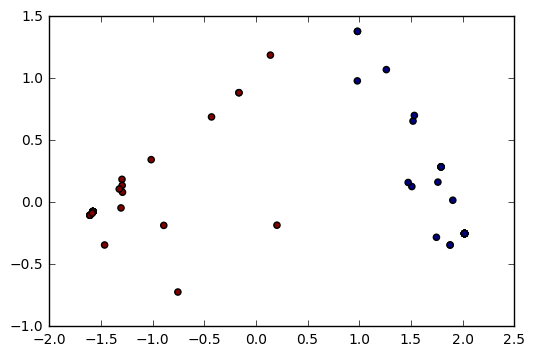

In [83]:
plt.scatter(x=plot_columns[:,0],y=plot_columns[:,1],c=labels)
plt.show()

In [84]:
kmeans_model = KMeans(n_clusters=5, random_state=1).fit(votes.iloc[:, 3:])
labels = kmeans_model.labels_

In [85]:
print(pd.crosstab(labels, votes["party"]))

party   D  I   R
row_0           
0       6  0   0
1       0  0  52
2      31  1   0
3       0  0   2
4       7  1   0


In [86]:
pca_5 = PCA(5)

In [87]:
plot_columns = pca_5.fit_transform(votes.iloc[:,3:18])
plot_columns

array([[ -1.01404771e+00,   3.45036811e-01,   6.27403677e-01,
         -4.63296092e-01,  -8.25755602e-02],
       [ -1.64869935e-01,   8.85020645e-01,   1.29313929e+00,
         -2.93833976e-01,   9.36746390e-02],
       [  2.01879354e+00,  -2.50982950e-01,   2.17726787e-05,
         -9.10496365e-02,  -7.62626606e-03],
       [ -1.57876445e+00,  -7.42959709e-02,  -2.04937216e-02,
          1.18304149e-02,  -1.00874573e-01],
       [  1.26163015e+00,   1.07112203e+00,   5.94668426e-02,
          2.25152346e-01,   4.19247013e-02],
       [  2.01879354e+00,  -2.50982950e-01,   2.17726787e-05,
         -9.10496365e-02,  -7.62626606e-03],
       [ -1.57876445e+00,  -7.42959709e-02,  -2.04937216e-02,
          1.18304149e-02,  -1.00874573e-01],
       [  2.01879354e+00,  -2.50982950e-01,   2.17726787e-05,
         -9.10496365e-02,  -7.62626606e-03],
       [ -1.57876445e+00,  -7.42959709e-02,  -2.04937216e-02,
          1.18304149e-02,  -1.00874573e-01],
       [  1.90485799e+00,   1.7866262

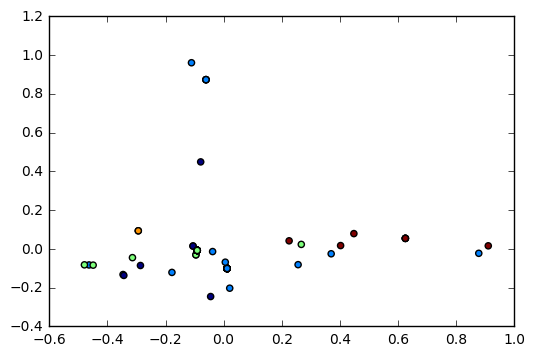

In [89]:
plt.scatter(x=plot_columns[:,3],y=plot_columns[:,4],c=labels)
plt.show()